In [11]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df,title="Graph"):
    evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]
    for eval in evals:
        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df,title="Graph",evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]):
    for eval in evals:
        ax = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

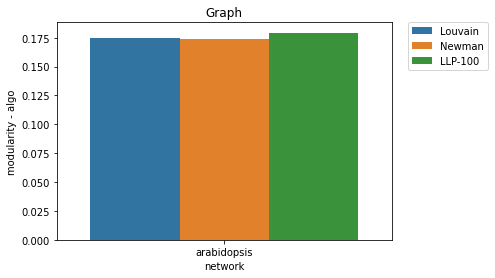

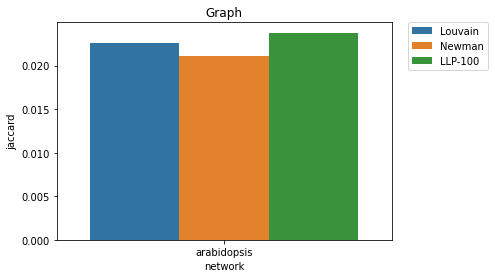

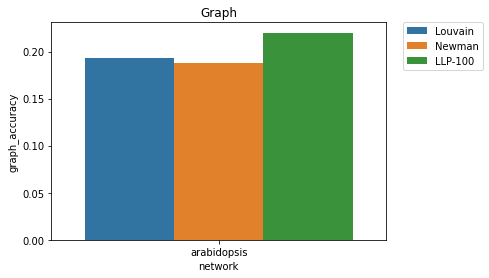

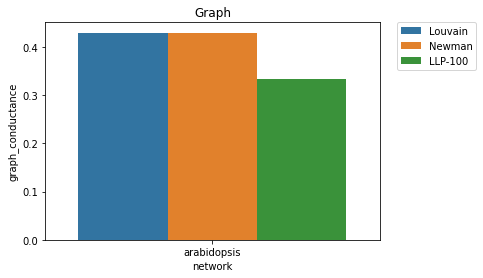

In [12]:
# on yeast and arabidopsis
input_folder = "31-05-2022--17-44-19 ara mod"
df = run_visu_benchmark(input_folder)
# display(df)
create_bar_graphs_benchmark(df)

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,time-sec,network
0,Louvain,0.029325,0.178662,0.022562,0.415482,0.648356,0.201705,97,5,None,None,NaN,NaN,6.464873,yeast
1,LLP-100,0.029325,0.178397,0.024068,0.375461,0.637731,0.219255,97,5,None,None,41.0,1.0,61.404861,yeast


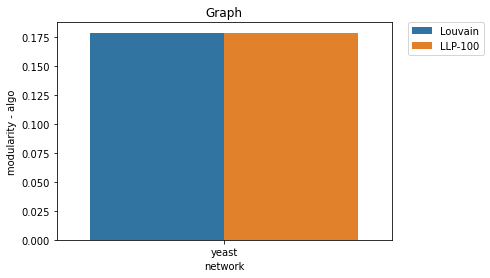

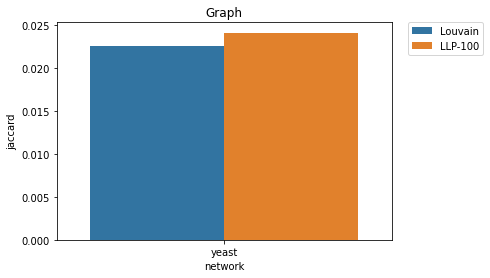

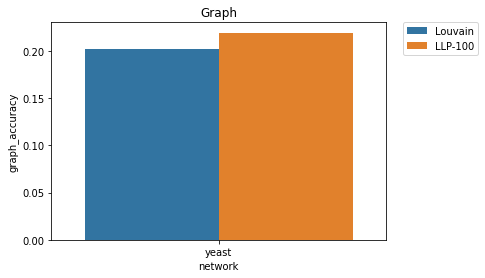

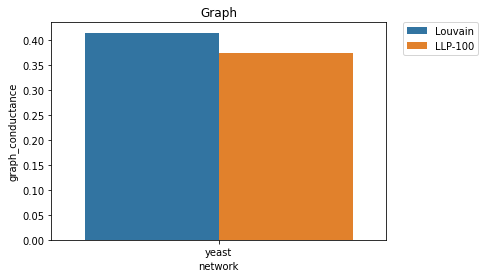

In [15]:
# on yeast and arabidopsis
input_folder = "31-05-2022--16-31-43 yeast mod 2"
df = run_visu_benchmark(input_folder)
display(df)
create_bar_graphs_benchmark(df)


,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,time-sec,network,mu
0,Louvain,0.363148,0.364951,0.592277,0.415748,0.976,0.852141,30,21,None,None,NaN,NaN,0.218543,1000_0.6_9,0.6
1,LLP100,0.363148,0.364453,0.596946,0.413939,0.972,0.849821,30,21,None,None,101.0,1.0,88.549965,1000_0.6_9,0.6
2,Louvain,0.362887,0.361804,0.747893,0.406670,0.983,0.923180,28,23,None,None,NaN,NaN,0.220430,1000_0.6_8,0.6
3,LLP100,0.362887,0.360370,0.645518,0.408947,0.973,0.886670,28,21,None,None,102.0,1.0,334.659694,1000_0.6_8,0.6
4,Louvain,0.363978,0.363010,0.720270,0.406466,0.978,0.902051,30,24,None,None,NaN,NaN,0.175257,1000_0.6_7,0.6
5,LLP100,0.363978,0.363904,0.700034,0.408016,0.983,0.902722,30,24,None,None,102.0,1.0,45.489649,1000_0.6_7,0.6
6,Louvain,0.364689,0.361664,0.588982,0.409110,0.974,0.857537,30,22,None,None,NaN,NaN,0.212577,1000_0.6_6,0.6
7,LLP100,0.364689,0.362034,0.634322,0.406493,0.972,0.875733,30,23,None,None,101.0,1.0,213.155754,1000_0.6_6,0.6
8,Louvain,0.365454,0.356400,0.428830,0.415131,0.943,0.767093,32,19,None,None,NaN,NaN,0.185768,1000_0.6_5,0.6
9,LLP100,0.365454,0.365226,0.577494,0.413738,0.986,0.845488,32,21,None,None,103.0,1.0,275.151590,1000_0.6_5,0.6


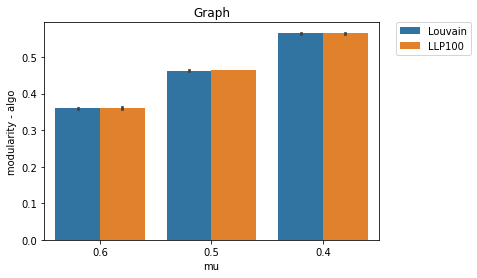

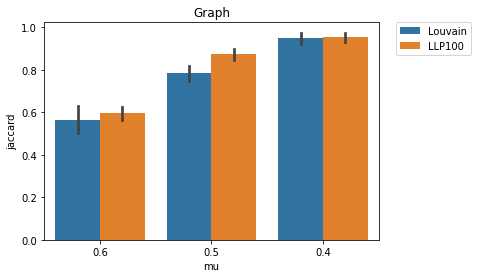

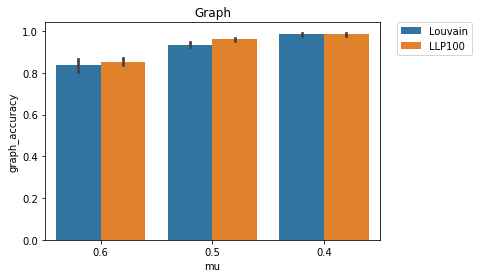

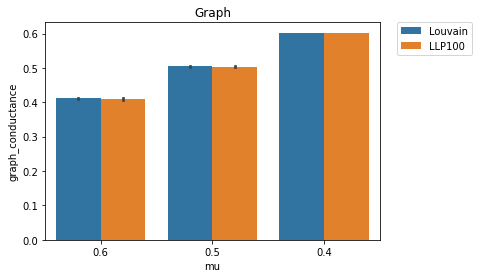

In [16]:
input_folder = "29-05-2022--21-34-19 1000 mod"
df = run_visu(input_folder)
display(df)
create_bar_graphs(df)

